**PROJET 2:                                   Identification Automatique des Maladies du Maïs**

**Badara Diop**<br>
**Fatimata Ka**<br>
**Limamoulaye Dia**<br>
**Elise Faye**<br>


**NB**:  Ce projet est réalisé sur **Google-Colab**



In [1]:
import tensorflow as tf
from  tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os



**Definition des Constantes**

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

**Importation des données**


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Papa\\Documents\\Projet Data Science\\Projet2\\Projet 2",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2552 files belonging to 5 classes.


In [4]:
#Un aperçu sur les differents types de données
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy', 'streak virus']

In [5]:
len(dataset)

80

**Visualisation de données**


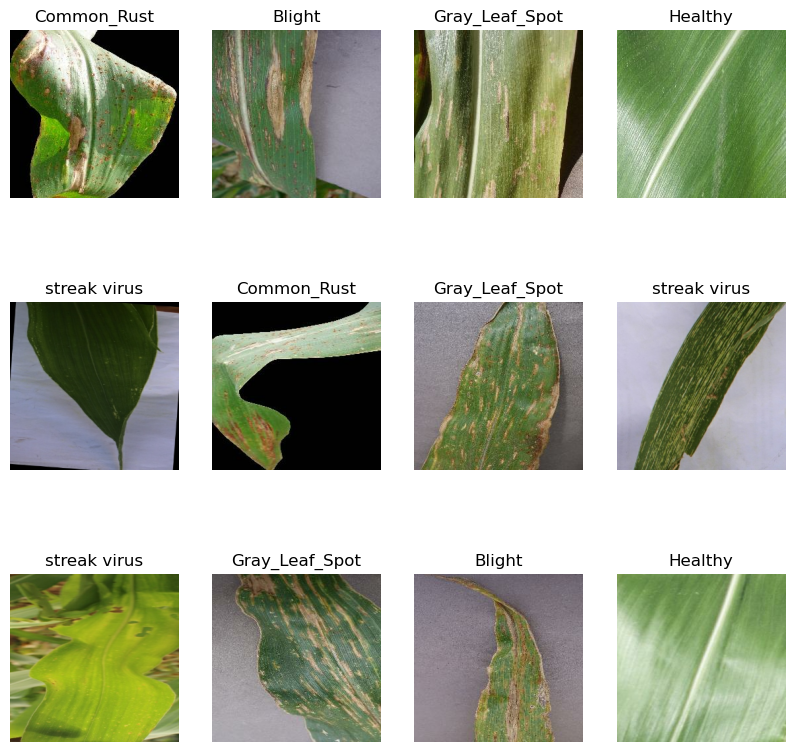

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

**Separation des données**

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

#Cette fonction separe de maniere automatique l'esnsemble des données en 3 catégories: 80% pour les données d'entraintement
#10% pour les données de validation et 10% pour test

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
#Test 
len(train_ds)+len(val_ds)+len(test_ds)==len(dataset)

True

**Pipeline de prétraitement: redimensionnement + normlisation**


In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

**CNN ET RESEAUX DE NEURONES**

In [11]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (32, 246016)             

**Compilation du modèle**

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Entrainement du modèle**

In [14]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10


64/64 [==============================] - 422s 5s/step - loss: 2.1026 - accuracy: 0.4985 - val_loss: 0.8324 - val_accuracy: 0.6094
Epoch 2/10
64/64 [==============================] - 307s 5s/step - loss: 0.7405 - accuracy: 0.7051 - val_loss: 0.5595 - val_accuracy: 0.8125
Epoch 3/10
64/64 [==============================] - 292s 4s/step - loss: 0.5367 - accuracy: 0.7936 - val_loss: 0.3922 - val_accuracy: 0.8750
Epoch 4/10
64/64 [==============================] - 317s 5s/step - loss: 0.4206 - accuracy: 0.8598 - val_loss: 0.3073 - val_accuracy: 0.9113
Epoch 5/10
64/64 [==============================] - 304s 4s/step - loss: 0.2645 - accuracy: 0.9147 - val_loss: 0.2742 - val_accuracy: 0.8945
Epoch 6/10
64/64 [==============================] - 292s 4s/step - loss: 0.2325 - accuracy: 0.9275 - val_loss: 0.1395 - val_accuracy: 0.9688
Epoch 7/10
64/64 [==============================] - 287s 4s/step - loss: 0.1801 - accuracy: 0.9461 - val_loss: 0.1265 - val_accuracy: 0.9648
Epoch 8/10


**Evaluation du modèle sur l'ensemble de données de test**

In [15]:
scores = model.evaluate(test_ds)
scores


8/8 [==============================] - 25s 756ms/step - loss: 0.0404 - accuracy: 0.9961


[0.040392857044935226, 0.99609375]

**Visualisation des performances du modèle pendant l'entraînement et la validation**

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
len(history.history['loss'])

10

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

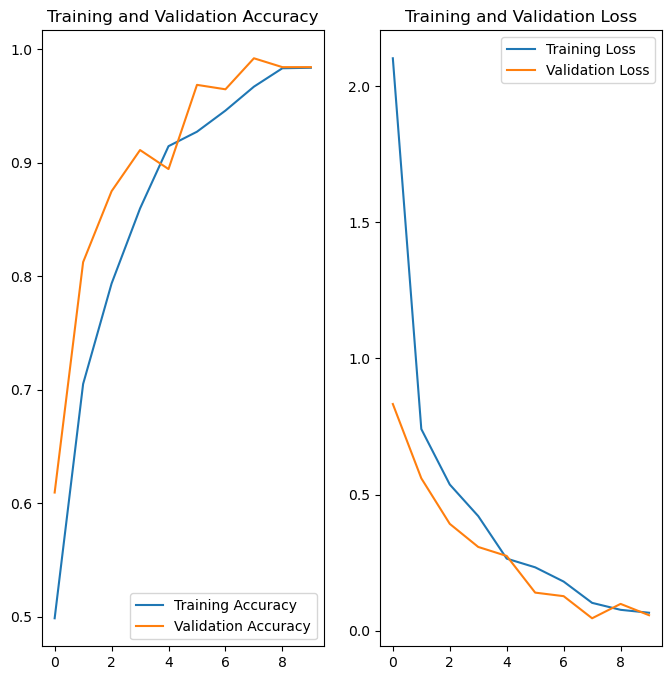

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Evaluation du modèle sur lot d'image de test**

first image to predict
actual label: streak virus
1/1 [==============================] - 2s 2s/step
predicted label: streak virus


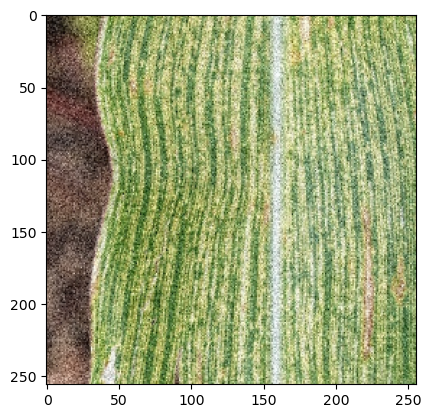

In [20]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
#Cette fonction prend en entrée un modèle entraîné et une image, puis retourne la classe prédite pour cette image 
#ainsi que la confiance associée à cette prédiction.

1/1 [==============================] - 0s 141ms/step


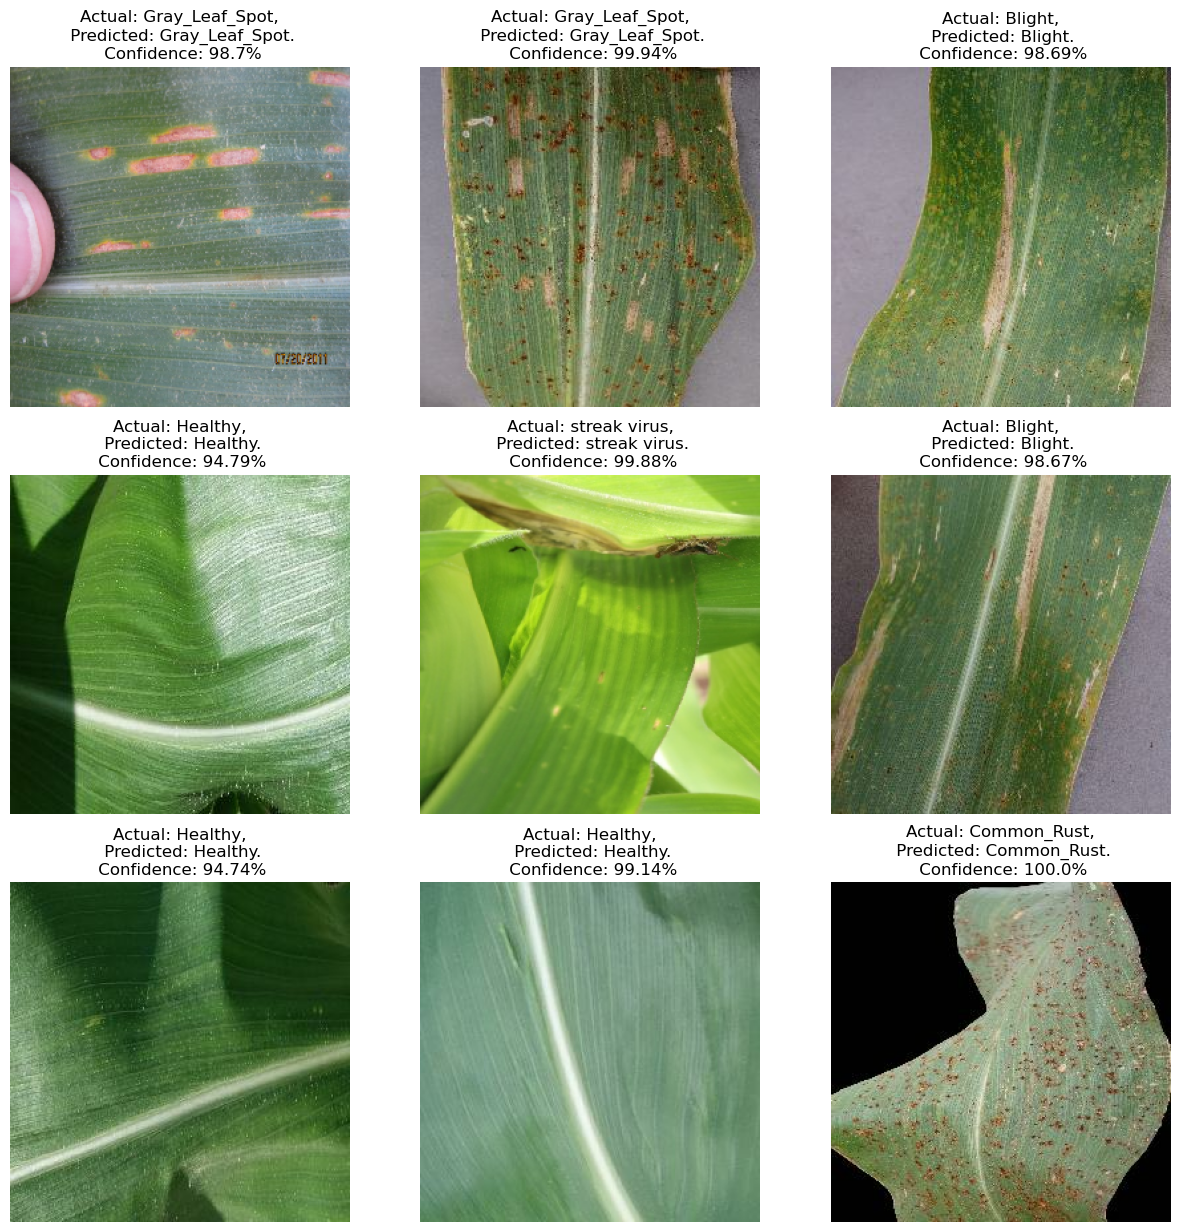

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [24]:
model.save("C:\\Users\\Papa\\Documents\\Projet Data Science\\Projet2\\Projet2V1.h5")